In [36]:
import proplot as pplt
import pandas as pd
import numpy as np
import os

floe_lib = {}
for file in os.listdir('../data/floe_tracker/parsed/all_floes/'):
    if 'csv' in file:
        year = int(file.replace('.csv', '').split('_')[-1])
        floe_lib[year] = pd.read_csv('../data/floe_tracker/parsed/all_floes/' + file, index_col=0)
    
# Drop 2020 data that has x_stere < 249e3, y_stere < -2090e3, y_stere > -638
y = floe_lib[2020]['y_stere']
x = floe_lib[2020]['x_stere']
idx = (x > 249e3) & ((y < -638e3) & (y > -2090e3))
floe_lib[2020] = floe_lib[2020].loc[idx].copy()

# Drop the 2020 floes with less than 201 pixels
floe_lib[2020] = floe_lib[2020].loc[floe_lib[2020].area >= 300].copy()

# Add circularity column
for year in floe_lib:
    floe_lib[year]['C'] = 4*np.pi*floe_lib[year]['area']/floe_lib[year]['perimeter']**2

In [42]:
data = []
for year in range(2003, 2021):
    n = len(floe_lib[year])
    n_passing = len(floe_lib[year].loc[floe_lib[year].C >= 0.6])
    print(year, floe_lib[year]['area'].max(), floe_lib[year]['area'].min(), n, n_passing)
    data.append([year, floe_lib[year]['area'].max(), floe_lib[year]['area'].min(), n, n_passing])
data_table2 = pd.DataFrame(data, columns=['year', 'max_pixels', 'min_pixels', 'n_init', 'n_circ_passing'])
data_table2.set_index('year', inplace=True)


2003 89678.0 301.0 99213 57789
2004 89879.0 301.0 71986 32072
2005 89892.0 301.0 94007 48103
2006 89992.0 301.0 91683 39292
2007 89737.0 301.0 103455 52588
2008 89489.0 301.0 134662 66002
2009 89896.0 301.0 127905 61046
2010 89672.0 301.0 104349 53259
2011 89795.0 301.0 120043 52458
2012 89950.0 301.0 102631 53608
2013 89973.0 301.0 134896 62358
2014 89873.0 301.0 104861 58455
2015 89914.0 301.0 93986 45228
2016 89997.0 301.0 137906 62244
2017 89967.0 301.0 119399 65845
2018 89876.0 301.0 109564 45051
2019 89710.0 301.0 94260 50388
2020 89902.0 300.0 146200 78101


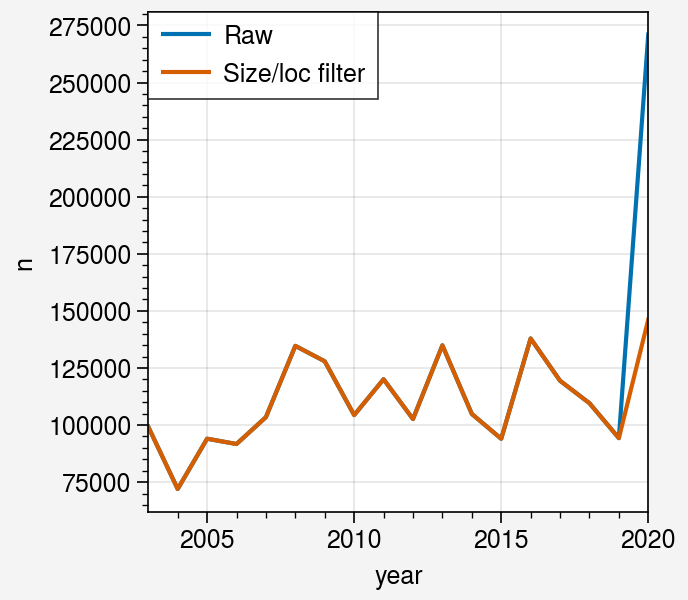

In [45]:
fig, ax = pplt.subplots()
ax.plot(data_table['year'].values, data_table['all_u'].values, label='Raw')
ax.plot(data_table2['year'].values, data_table2['n_init'].values, label='Size/loc filter')
ax.legend(loc='ul', ncols=1)
ax.format(ylabel='n', xlabel='year')

In [53]:
tracked_floes = {}
for file in os.listdir('../data/floe_tracker/parsed/tracked_floes/'):
    if 'csv' in file:
        year = int(file.replace('.csv', '').split('_')[-1])
        tracked_floes[year] = pd.read_csv('../data/floe_tracker/parsed/tracked_floes/' + file, index_col=0)
    

In [54]:
print(len(tracked_floes[2020]))

27443


In [55]:
# Drop 2020 data that has x_stere < 249e3, y_stere < -2090e3, y_stere > -638
y = tracked_floes[2020]['y_stere']
x = tracked_floes[2020]['x_stere']
idx = (x > 249e3) & ((y < -638e3) & (y > -2090e3))
tracked_floes[2020] = tracked_floes[2020].loc[idx].copy()

# Drop the 2020 floes with less than 201 pixels
tracked_floes[2020] = tracked_floes[2020].loc[tracked_floes[2020].area >= 300].copy()

# Add circularity column
for year in tracked_floes:
    tracked_floes[year]['C'] = 4*np.pi*tracked_floes[year]['area']/tracked_floes[year]['perimeter']**2

In [72]:
data_table2['n_tracked_init'] = 0
for year in tracked_floes:
    data_table2.loc[year, 'n_tracked_init'] = len(tracked_floes[year].loc[tracked_floes[year]['C'] >= 0.6])
    data_table2.loc[year, 'n_tracked_unique'] = len(np.unique(tracked_floes[year].loc[tracked_floes[year]['C'] >= 0.6]['floe_id']))

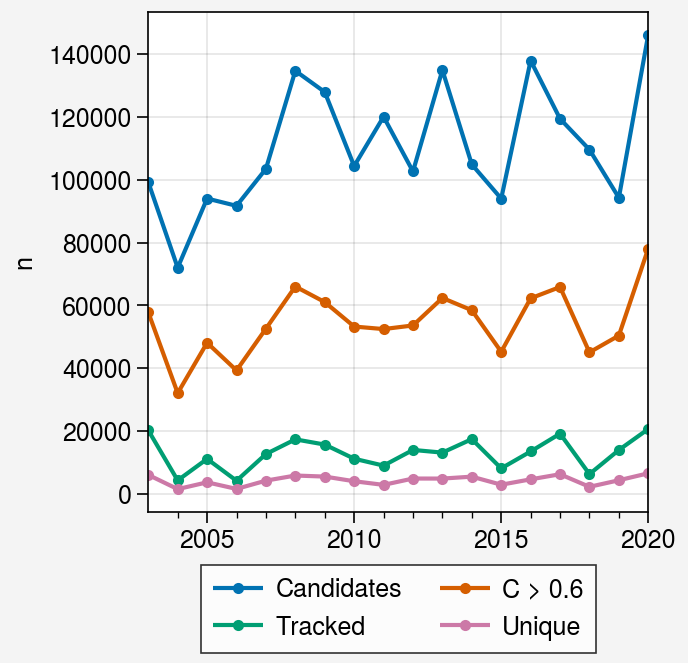

In [79]:
fig, ax = pplt.subplots()
ax.plot(data_table2.index, data_table2.n_init, marker='.', label='Candidates')
ax.plot(data_table2.index, data_table2.n_circ_passing, marker='.', label='C > 0.6')
ax.plot(data_table2.index, data_table2.n_tracked_init, marker='.', label='Tracked')
ax.plot(data_table2.index, data_table2.n_tracked_unique, marker='.', label='Unique')
ax.legend(loc='b', ncols=2)
ax.format(ytickminor=False, ylabel='n', xlabel='')
fig.save('../figures/fig01_available_data.pdf', dpi=300)

In [78]:
data_table2.mean(axis=0)

max_pixels           89844.000000
min_pixels             300.944444
n_init              110611.444444
n_circ_passing       54660.388889
n_tracked_init       12889.500000
n_tracked_unique      4304.222222
dtype: float64

In [35]:
# Drop 2020 data that has x_stere < 249e3, y_stere < -2090e3, y_stere > -638
y = floe_lib[2020]['y_stere']
x = floe_lib[2020]['x_stere']
idx = (x > 249e3) & ((y < -638e3) & (y > -2090e3))
floe_lib[2020] = floe_lib[2020].loc[idx].copy()
print(len(floe_lib[2020]))

196709


In [4]:
data_table = pd.read_csv('../data/len_lib_fram.csv')